# Task 6 - Prediction using Decision Tree Algorithm 

### Create the Decision Tree classiﬁer and visualize it graphically

In [1]:
### Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
### Loading iris_dataset
iris_data=pd.read_csv('Iris.csv')
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
### Basic information about dataset
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
### value_counts() function returns object containing counts of unique values
iris_data["Species"].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

In [5]:
### describe() is used to view some basic statistical details like percentile, mean, std etc
iris_data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


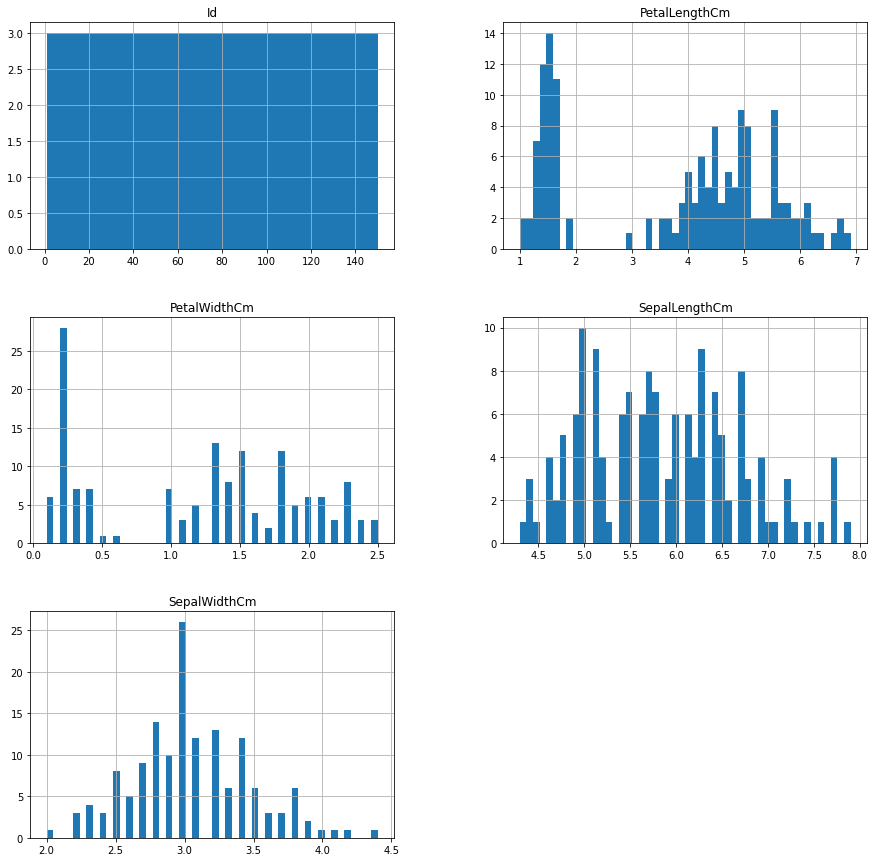

In [6]:
### hist() function in pyplot module of matplotlib library is used to plot a histogram
iris_data.hist(bins=50,figsize=(15,15))
plt.show()

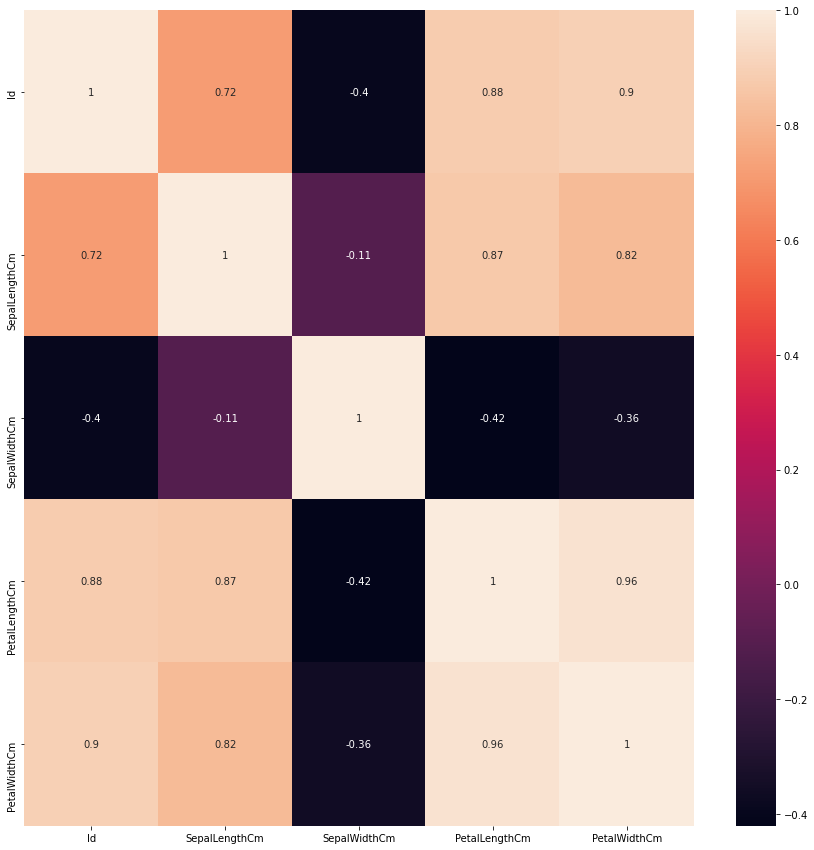

In [7]:
### Correlation heat map (Compute correlation matrix between the features in the dataset)
cor=iris_data.corr()
plt.figure(figsize=(15,15))
sns.heatmap(cor,annot=True)

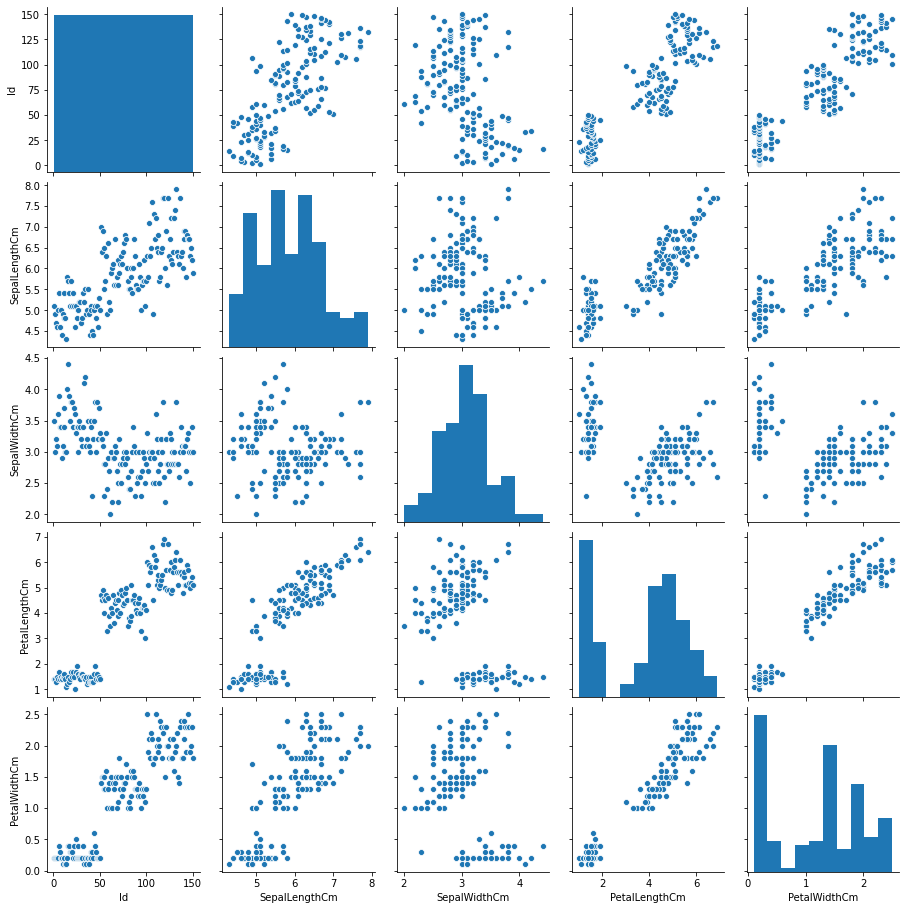

In [8]:
### to check relationship between columns
###shows the relationship for (n, 2) combination of variable in a DataFrame as a matrix of plots and the diagonal plots are the univariate plots.
sns.pairplot(iris_data)### 

In [9]:
### Handling categorical variable with ordinal number 
iris_data_copy=iris_data.copy()
species_map={'Iris-setosa':0,
            'Iris-versicolor':1,
            'Iris-virginica':2}
iris_data_copy['species_ordinal']=iris_data.Species.map(species_map)
iris_data_copy.drop(['Species'],axis=1)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,species_ordinal
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


In [10]:
X=iris_data_copy[['PetalLengthCm','PetalWidthCm']].values
y=iris_data_copy['species_ordinal'].values

In [11]:
### Spliting training and testing dataset
from sklearn.model_selection import train_test_split
train_inputs,test_inputs,train_classes,test_classes=train_test_split(X,y,test_size=0.2,random_state=42)

In [13]:
### Training the model with the dataset
from sklearn.tree import DecisionTreeClassifier
tree_clf=DecisionTreeClassifier(max_depth=2,random_state=42)
tree_clf.fit(train_inputs,train_classes)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [16]:
### Testing the model
tree_clf.score(test_inputs,test_classes)

0.9666666666666667

In [17]:
### Importing libraries for printing the Trained Decision Tree
from sklearn.tree import export_graphviz
from graphviz import Source
import os
import pydot

In [21]:
target_names=iris_data.Species.unique()


In [22]:
f="C:/Users/SUNDARESAN/Videos/Data Science Projects/iris_tree.dot"
export_graphviz(tree_clf,out_file=f,feature_names=iris_data.columns[1:3],
               class_names=target_names,
               rounded=True,
               filled=True)

In [23]:
(graph,) = pydot.graph_from_dot_file('C:/Users/SUNDARESAN/Videos/Data Science Projects/iris_tree.dot')
graph.write_png('somefile.png')

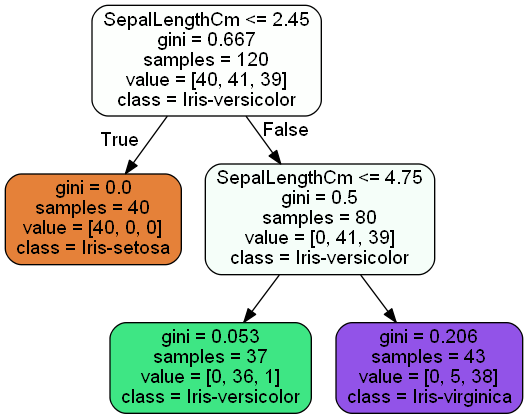

In [24]:
from IPython.display import Image
Image(filename='somefile.png')

In [26]:
### Predicting the species
tree_clf.predict([[6,1.5]])

array([2], dtype=int64)

#  Thank you